In [1]:
from tensorboard.backend.event_processing import event_accumulator
import tensorboard as tb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")

def percent_difference(a, b):
    delta = np.abs(a - b)
    average = np.sum([a, b]) / 2.0

    return (delta / average) * 100

def relative_difference(ref, a):
    delta = a - ref

    return delta / ref


In [2]:
v12 = event_accumulator.EventAccumulator("../model_training/version_12/")
v13 = event_accumulator.EventAccumulator("../model_training/version_13/")
v12.Reload()
v13.Reload()

In [3]:
v12_loss_events = [(ev.step, ev.value) for ev in v12.Scalars("train_loss")]
v13_loss_events = [(ev.step, ev.value) for ev in v13.Scalars("train_loss")]

v12_train_loss = {
    "step": [],
    "loss": []
}

v13_train_loss = {
    "step": [],
    "loss": []
}

for step, loss in v12_loss_events:
    v12_train_loss["step"].append(step)
    v12_train_loss["loss"].append(loss)

for step, loss in v13_loss_events:
    v13_train_loss["step"].append(step)
    v13_train_loss["loss"].append(loss)

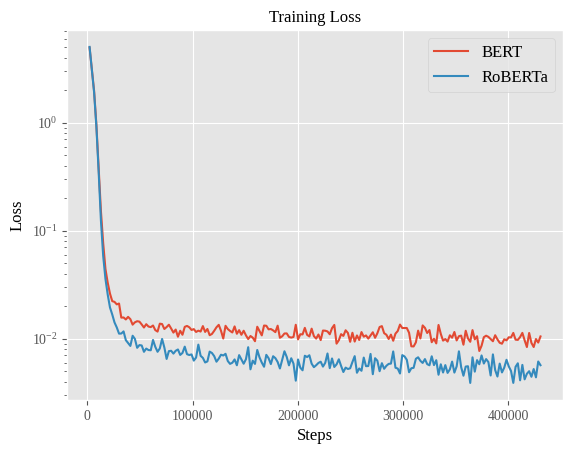

In [23]:
font = {
    "family": "liberation serif",
    "color": "black",
    "weight": "normal",
    "size": 12
}

plt.plot(v12_train_loss["step"], v12_train_loss["loss"], label="BERT")
plt.plot(v13_train_loss["step"], v13_train_loss["loss"], label="RoBERTa")
plt.title("Training Loss", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.ylabel("Loss", fontdict=font)
plt.yscale("log")
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})
plt.tick_params(labelfontfamily="liberation serif")

plt.savefig("../thesis/figures/scratch_training_loss.png", format="png")
plt.show()

In [5]:
v12_ppl_events = [(ev.step, ev.value) for ev in v12.Scalars("train_ppl")]
v13_ppl_events = [(ev.step, ev.value) for ev in v13.Scalars("train_ppl")]

v12_train_ppl = {
    "step": [],
    "ppl": []
}

for step, value in v12_ppl_events:
    v12_train_ppl["ppl"].append(value)
    v12_train_ppl["step"].append(step)

v13_train_ppl = {
    "step": [],
    "ppl": []
}

for step, value in v13_ppl_events:
    v13_train_ppl["ppl"].append(value)
    v13_train_ppl["step"].append(step)

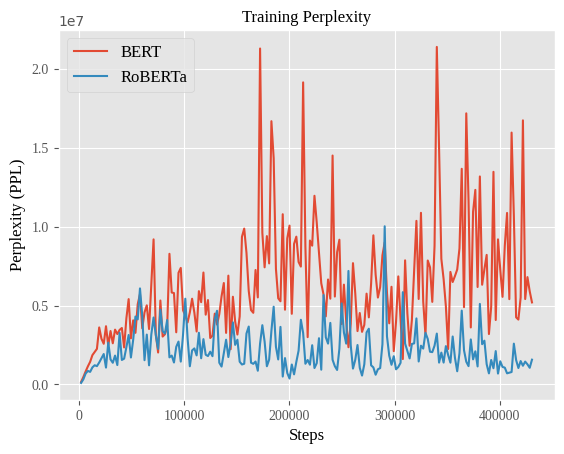

In [22]:
plt.plot(v12_train_ppl["step"], v12_train_ppl["ppl"], label="BERT")
plt.plot(v13_train_ppl["step"], v13_train_ppl["ppl"], label="RoBERTa")
plt.title("Training Perplexity", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.ylabel("Perplexity (PPL)", fontdict=font)
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})
plt.tick_params(labelfontfamily="liberation serif")

plt.savefig("../thesis/figures/scratch_training_ppl.png", format="png")
plt.show()

In [7]:
v15 = event_accumulator.EventAccumulator("../model_training/version_15/")
v18 = event_accumulator.EventAccumulator("../model_training/version_18/")
v15.Reload()
v18.Reload()

In [8]:
v15_training_loss_events = [(ev.step, ev.value) for ev in v15.Scalars("train_loss")]
v18_training_loss_events = [(ev.step, ev.value) for ev in v18.Scalars("train_loss")]

train_loss_stats = {
    "v15_step": [],
    "v15_loss": [],
    "v18_step": [],
    "v18_loss": []
}

for step, value in v15_training_loss_events:
    train_loss_stats["v15_step"].append(step)
    train_loss_stats["v15_loss"].append(value)

for step, value in v18_training_loss_events:
    train_loss_stats["v18_step"].append(step)
    train_loss_stats["v18_loss"].append(value)

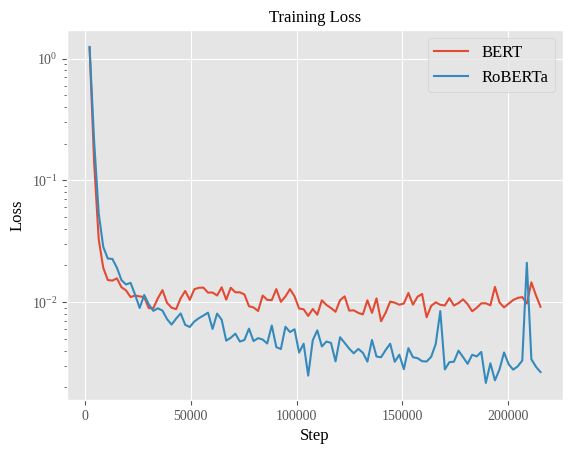

In [34]:
plt.cla(), plt.clf()

plt.plot(train_loss_stats["v15_step"], train_loss_stats["v15_loss"], label="BERT")
plt.plot(train_loss_stats["v18_step"], train_loss_stats["v18_loss"], label="RoBERTa")
plt.title("Training Loss", fontdict=font)
plt.xlabel("Step", fontdict=font)
plt.ylabel("Loss", fontdict=font)
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})
plt.tick_params(labelfontfamily="liberation serif")
plt.yscale("log")

plt.savefig("../thesis/figures/pretrained_training_loss.png", format="png")
plt.show()

In [10]:
v15_training_ppl_events = [(ev.step, ev.value) for ev in v15.Scalars("train_ppl")]
v18_training_ppl_events = [(ev.step, ev.value) for ev in v18.Scalars("train_ppl")]

train_ppl_stats = {
    "v15_step": [],
    "v15_ppl": [],
    "v18_step": [],
    "v18_ppl": []
}

for step, value in v15_training_ppl_events:
    train_ppl_stats["v15_step"].append(step)
    train_ppl_stats["v15_ppl"].append(value)

for step, value in v18_training_ppl_events:
    train_ppl_stats["v18_step"].append(step)
    train_ppl_stats["v18_ppl"].append(value)

print("Scratch:")
print("------------------------------------------")
print(f'BERT:    {v12_train_ppl["ppl"][-1] * 1e-7}e7')
print(f'RoBERTa: {v13_train_ppl["ppl"][-1] * 1e-7}e7')
print("\nPretrained:")
print("------------------------------------------")
print(f'BERT:    {train_ppl_stats["v15_ppl"][-1] * 1e-9}e9')
print(f'RoBERTa: {train_ppl_stats["v18_ppl"][-1] * 1e-9}e9')

Scratch:
------------------------------------------
BERT:    0.5203529e7
RoBERTa: 0.1570832875e7

Pretrained:
------------------------------------------
BERT:    0.292647168e9
RoBERTa: 0.165831568e9


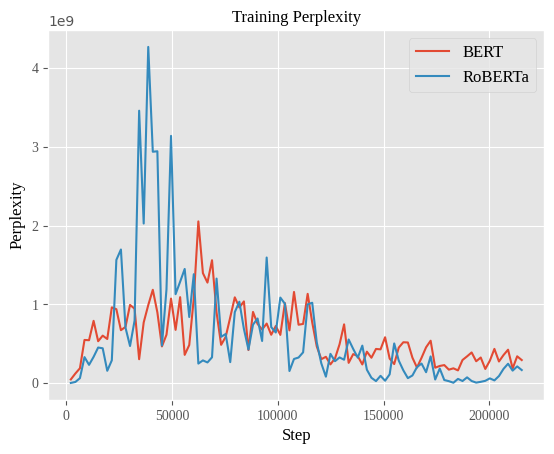

In [35]:
plt.plot(train_ppl_stats["v15_step"], train_ppl_stats["v15_ppl"], label="BERT")
plt.plot(train_ppl_stats["v18_step"], train_ppl_stats["v18_ppl"], label="RoBERTa")
plt.title("Training Perplexity", fontdict=font)
plt.xlabel("Step", fontdict=font)
plt.ylabel("Perplexity", fontdict=font)
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})
plt.tick_params(labelfontfamily="liberation serif")

plt.savefig("../thesis/figures/pretrained_training_ppl.png", format="png")
plt.show()

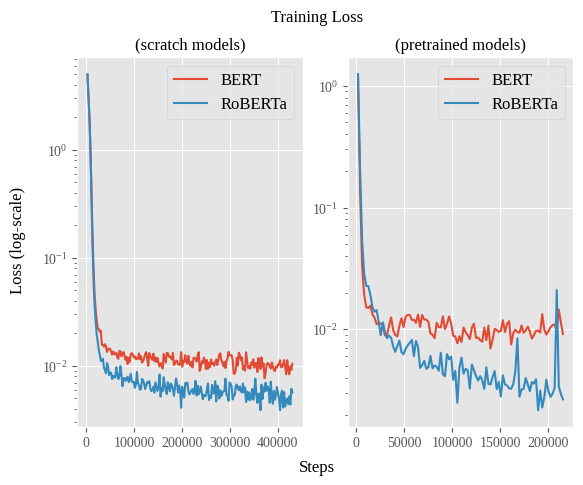

In [12]:
font = {
    "family": "liberation serif",
    "color": "black",
    "weight": "normal",
    "size": 12
}

fig, ax = plt.subplots(1, 2)

fig.suptitle("Training Loss", fontdict=font)
fig.supxlabel("Steps", fontdict=font)
fig.supylabel("Loss (log-scale)", fontdict=font)

ax[0].plot(v12_train_loss["step"], v12_train_loss["loss"], label="BERT")
ax[0].plot(v13_train_loss["step"], v13_train_loss["loss"], label="RoBERTa")
ax[0].set_title("(scratch models)", fontdict=font)
ax[0].tick_params(labelfontfamily="liberation serif")
ax[0].set_yscale("log")
ax[0].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

ax[1].plot(train_loss_stats["v15_step"], train_loss_stats["v15_loss"], label="BERT")
ax[1].plot(train_loss_stats["v18_step"], train_loss_stats["v18_loss"], label="RoBERTa")
ax[1].set_title("(pretrained models)", fontdict=font)
ax[1].tick_params(labelfontfamily="liberation serif")
ax[1].set_yscale("log")
ax[1].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.savefig("../thesis/figures/training_loss.png", format="png")
plt.show()

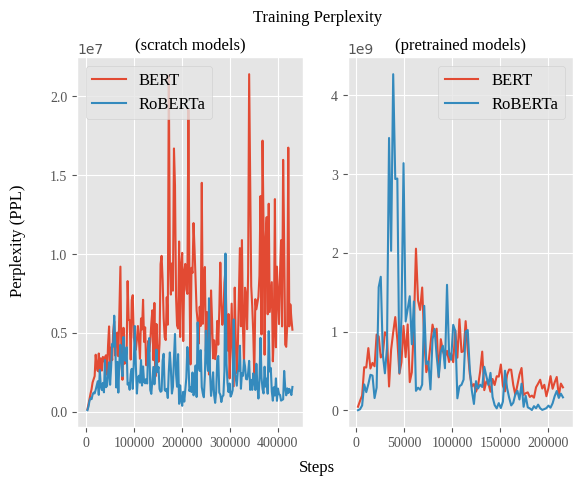

In [13]:
fig, ax = plt.subplots(1, 2)

fig.suptitle("Training Perplexity", fontdict=font)
fig.supylabel("Perplexity (PPL)", fontdict=font)
fig.supxlabel("Steps", fontdict=font)

ax[0].plot(v12_train_ppl["step"], v12_train_ppl["ppl"], label="BERT")
ax[0].plot(v13_train_ppl["step"], v13_train_ppl["ppl"], label="RoBERTa")
ax[0].set_title("(scratch models)", fontdict=font)
ax[0].tick_params(labelfontfamily="liberation serif")
ax[0].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

ax[1].plot(train_ppl_stats["v15_step"], train_ppl_stats["v15_ppl"], label="BERT")
ax[1].plot(train_ppl_stats["v18_step"], train_ppl_stats["v18_ppl"], label="RoBERTa")
ax[1].set_title("(pretrained models)", fontdict=font)
ax[1].tick_params(labelfontfamily="liberation serif")
ax[1].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.savefig("../thesis/figures/training_ppl.png", format="png")
plt.show()

In [14]:
scratch_bert_final_ppl = v12_train_ppl["ppl"][-1]
scratch_roberta_final_ppl = v13_train_ppl["ppl"][-1]
pretrained_bert_final_ppl = train_ppl_stats["v15_ppl"][-1]
pretrained_roberta_final_ppl = train_ppl_stats["v18_ppl"][-1]

print("Scratch Models:")
print("-----------------------")
print(f"BERT:    {scratch_bert_final_ppl}")
print(f"RoBERTa: {scratch_roberta_final_ppl}")

print("\nPretrained Models:")
print("-----------------------")
print(f"BERT:    {pretrained_bert_final_ppl}")
print(f"RoBERTa: {pretrained_roberta_final_ppl}")

print("\nPercent Differences:")
print("-----------------------")
print(f"BERT: {percent_difference(scratch_bert_final_ppl, pretrained_bert_final_ppl)}")
print(scratch_bert_final_ppl < pretrained_bert_final_ppl)
print(f"RoBERTa: {percent_difference(scratch_roberta_final_ppl, pretrained_roberta_final_ppl)}")
print(scratch_roberta_final_ppl < pretrained_roberta_final_ppl)

print("\nAbsolute Difference:")
print("-----------------------")
print(f"BERT:    {np.abs(scratch_bert_final_ppl - pretrained_bert_final_ppl) * 1e-7}e7")
print(f"RoBERTa: {np.abs(scratch_roberta_final_ppl - pretrained_roberta_final_ppl) * 1e-7}e7")

print("\nRelative Difference:")
print("-----------------------")
print(f"BERT models:    {relative_difference(scratch_bert_final_ppl, pretrained_bert_final_ppl)}")
print(f"RoBERTa models: {relative_difference(scratch_roberta_final_ppl, pretrained_roberta_final_ppl)}")

Scratch Models:
-----------------------
BERT:    5203529.0
RoBERTa: 1570832.875

Pretrained Models:
-----------------------
BERT:    292647168.0
RoBERTa: 165831568.0

Percent Differences:
-----------------------
BERT: 193.01189615816142
True
RoBERTa: 196.24657025994998
True

Absolute Difference:
-----------------------
BERT:    28.7443639e7
RoBERTa: 16.4260735125e7

Relative Difference:
-----------------------
BERT models:    55.2401339552446
RoBERTa models: 104.56919876024367


In [28]:
v12_valid_events = [(ev.step, ev.value) for ev in v12.Scalars("val_loss")]
v13_valid_events = [(ev.step, ev.value) for ev in v13.Scalars("val_loss")]
v15_valid_events = [(ev.step, ev.value) for ev in v15.Scalars("val_loss")]
v18_valid_events = [(ev.step, ev.value) for ev in v18.Scalars("val_loss")]

valid_stats = {
    "v12_step": [],
    "v12_loss": [],
    "v12_ppl": [],
    "v13_step": [],
    "v13_loss": [],
    "v13_ppl": [],
    "v15_step": [],
    "v15_loss": [],
    "v15_ppl": [],
    "v18_step": [],
    "v18_loss": [],
    "v18_ppl": [],
}

for step, value in v12_valid_events:
    valid_stats["v12_step"].append(step)
    valid_stats["v12_loss"].append(value)

for step, value in v13_valid_events:
    valid_stats["v13_step"].append(step)
    valid_stats["v13_loss"].append(value)

for step, value in v15_valid_events:
    valid_stats["v15_step"].append(step)
    valid_stats["v15_loss"].append(value)

for step, value in v18_valid_events:
    valid_stats["v18_step"].append(step)
    valid_stats["v18_loss"].append(value)

v12_valid_events = [(ev.step, ev.value) for ev in v12.Scalars("val_ppl")]
v13_valid_events = [(ev.step, ev.value) for ev in v13.Scalars("val_ppl")]
v15_valid_events = [(ev.step, ev.value) for ev in v15.Scalars("val_ppl")]
v18_valid_events = [(ev.step, ev.value) for ev in v18.Scalars("val_ppl")]

for step, value in v12_valid_events:
    valid_stats["v12_ppl"].append(value)

for step, value in v13_valid_events:
    valid_stats["v13_ppl"].append(value)

for step, value in v15_valid_events:
    valid_stats["v15_ppl"].append(value)

for step, value in v18_valid_events:
    valid_stats["v18_ppl"].append(value)

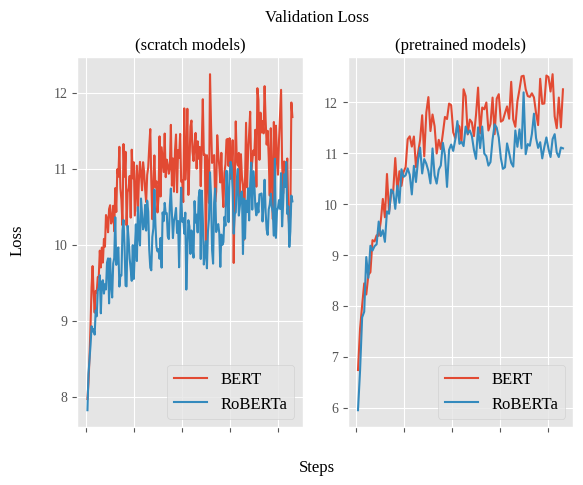

In [16]:
fig, ax = plt.subplots(1, 2)

fig.suptitle("Validation Loss", fontdict=font)
fig.supxlabel("Steps", fontdict=font)
fig.supylabel("Loss", fontdict=font)

ax[0].plot(valid_stats["v12_step"], valid_stats["v12_loss"], label="BERT")
ax[0].plot(valid_stats["v13_step"], valid_stats["v13_loss"], label="RoBERTa")
ax[0].set_title("(scratch models)", fontdict=font)
ax[0].tick_params('x', labelbottom=False)
ax[0].tick_params(labelfontfamily="liberation serif")
ax[0].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

ax[1].plot(valid_stats["v15_step"], valid_stats["v15_loss"], label="BERT")
ax[1].plot(valid_stats["v18_step"], valid_stats["v18_loss"], label="RoBERTa")
ax[1].set_title("(pretrained models)", fontdict=font)
ax[1].tick_params('x', labelbottom=False)
ax[1].tick_params(labelfontfamily="liberation serif")
ax[1].legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.show()

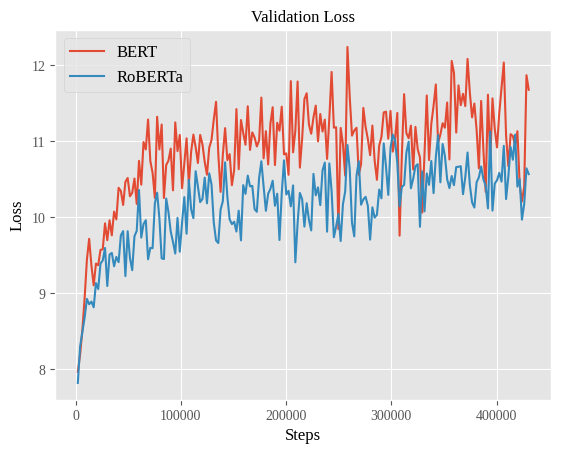

In [27]:
plt.plot(valid_stats["v12_step"], valid_stats["v12_loss"], label="BERT")
plt.plot(valid_stats["v13_step"], valid_stats["v13_loss"], label="RoBERTa")
plt.ylabel("Loss", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.title("Validation Loss", fontdict=font)
plt.tick_params(labelfontfamily="liberation serif")
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.savefig("../thesis/figures/scratch_validation_loss.png", format="png")
plt.show()

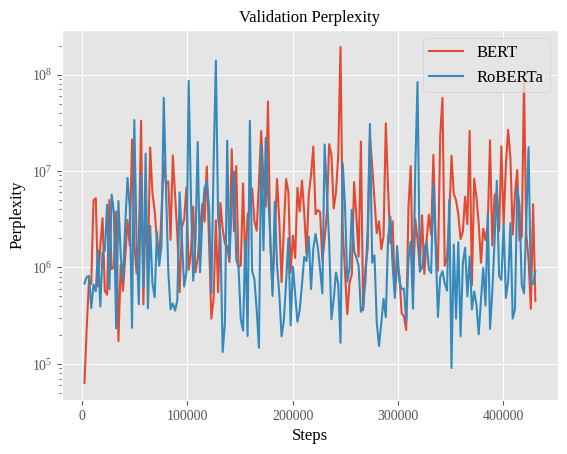

In [31]:
plt.plot(valid_stats["v12_step"], valid_stats["v12_ppl"], label="BERT")
plt.plot(valid_stats["v13_step"], valid_stats["v13_ppl"], label="RoBERTa")
plt.ylabel("Perplexity", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.title("Validation Perplexity", fontdict=font)
plt.tick_params(labelfontfamily="liberation serif")
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})
plt.yscale("log")

plt.savefig("../thesis/figures/scratch_validation_ppl.png", format="png")
plt.show()

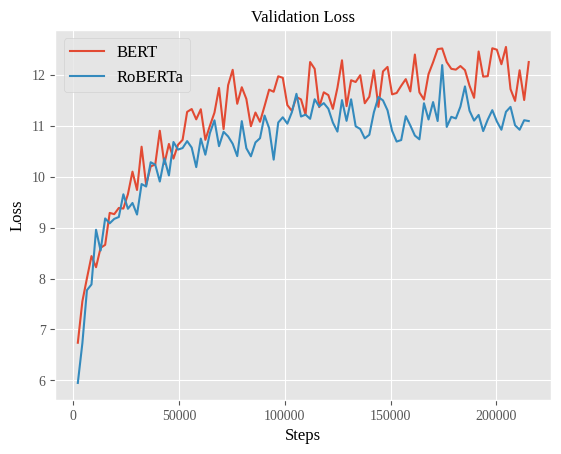

In [44]:
plt.plot(valid_stats["v15_step"], valid_stats["v15_loss"], label="BERT")
plt.plot(valid_stats["v18_step"], valid_stats["v18_loss"], label="RoBERTa")
plt.ylabel("Loss", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.title("Validation Loss", fontdict=font)
plt.tick_params(labelfontfamily="liberation serif")
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.savefig("../thesis/figures/pretrained_validation_loss.png", format="png")
plt.show()

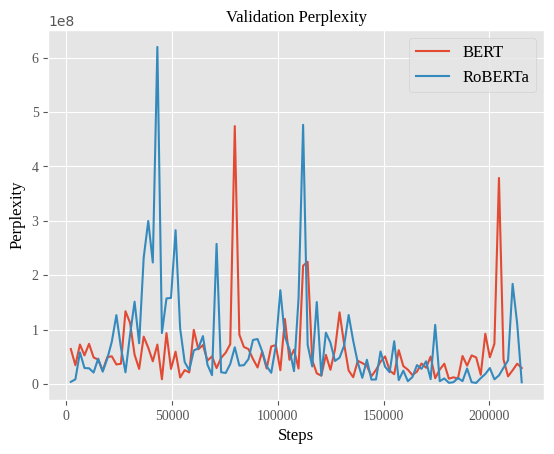

In [43]:
plt.plot(valid_stats["v15_step"], valid_stats["v15_ppl"], label="BERT")
plt.plot(valid_stats["v18_step"], valid_stats["v18_ppl"], label="RoBERTa")
plt.ylabel("Perplexity", fontdict=font)
plt.xlabel("Steps", fontdict=font)
plt.title("Validation Perplexity", fontdict=font)
plt.tick_params(labelfontfamily="liberation serif")
plt.legend(prop={"family": "liberation serif", "weight": "normal", "size": 12})

plt.savefig("../thesis/figures/pretrained_validation_ppl.png", format="png")
plt.show()

In [17]:
scratch_bert = 1435064.875
scratch_roberta = 10376598.000
pretrained_bert = 13805354.000
pretrained_roberta = 6816011.500

print("Scratch:")
print("----------------------------------")
print(f"BERT:    {scratch_bert * 1e-7}e7")
print(f"RoBERTa: {scratch_roberta * 1e-7}e7")
print("\nPretrained:")
print("----------------------------------")
print(f"BERT:    {pretrained_bert * 1e-7}e7")
print(f"RoBERTa: {pretrained_roberta * 1e-7}e7")
print("\nPercent Differences:")
print("----------------------------------")
print(percent_difference(scratch_bert, pretrained_bert))
print(scratch_bert < pretrained_bert)
print(percent_difference(scratch_roberta, pretrained_roberta))
print(scratch_roberta < pretrained_roberta)
print("\nAbsolute Differences:")
print("----------------------------------")
print(f"BERT:    {np.abs(scratch_bert - pretrained_bert) * 1e-7}e7")
print(f"RoBERTa: {np.abs(scratch_roberta - pretrained_roberta) * 1e-7}e7")
print("\nRelative Differences:")
print("----------------------------------")
print(f"BERT:    {relative_difference(scratch_bert, pretrained_bert)}")
print(f"RoBERTa: {relative_difference(scratch_roberta, pretrained_roberta)}")

Scratch:
----------------------------------
BERT:    0.1435064875e7
RoBERTa: 1.0376598e7

Pretrained:
----------------------------------
BERT:    1.3805353999999999e7
RoBERTa: 0.68160115e7

Percent Differences:
----------------------------------
162.33529047278236
True
41.41996594525107
False

Absolute Differences:
----------------------------------
BERT:    1.2370289125e7
RoBERTa: 0.35605865e7

Relative Differences:
----------------------------------
BERT:    8.620020837037071
RoBERTa: -0.34313620899643604
